In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

## Play Store Listings

In [23]:
google_play_df = pd.read_csv("data/googleplaystore.csv")
print(google_play_df.shape)
google_play_df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Cleaning

#### Checking for duplicate rows
Let's do a quick check to see if there are duplicate rows.

In [24]:
google_play_df.duplicated().max()

True

It looks like there are duplicate rows. Since this data comes from a data scraping project, this is not too much of a surprise.

#### Removing duplicate rows
let's remove the duplicate rows from our data set.

In [25]:
google_play_df.drop_duplicates(inplace=True)
print(google_play_df.shape)
google_play_df.head()

(10358, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Testing for missing values
Let's do a quick check for missing values.

In [26]:
google_play_df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Ok, missing ratings are definitely an issue in this data. Are there any apps with a rating of zero?

In [27]:
google_play_df[google_play_df['Rating']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Nope. I am going to treat missing ratings as zero ratings.  

#### Replace missing ratings with zero

In [28]:
google_play_df['Rating'].fillna(0, inplace=True)
google_play_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

#### Checking for multiple app listings
We have removed duplicate rows but there may still be multiple listings for a given app. Let's check for duplicated values in the `APP` column. 

In [29]:
google_play_df['App'].duplicated().max()

True

It looks like we may want to aggregate data for repeated listings as we answer questions below.

#### Checking for Unusual `Category` Vaues

In [30]:
google_play_df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The value `1.9` does not seem to be a legitimate category. We chose to drop the row with for the app in this category from our analysis.

#### Dropping the `1.9` Category

In [31]:
google_play_df =  google_play_df[google_play_df['Category']!='1.9']
print(google_play_df.shape)
google_play_df['Category'].value_counts()

(10357, 13)


FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

#### Convert `Size` to Number
We note that the `Size` variable refers to the storage space required by the app measured in Megabytes. Let's investigate the data type and unique values for this variable. 

In [32]:
print(google_play_df['Size'].dtype)
google_play_df['Size'].unique()

object


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [33]:
def size_converter(string):
    if string == 'Varies with device':
        size = np.nan
    else:
        unit = string[-1]
        num_string = string[:-1]
        num = float(num_string)
        if unit == 'k':
            size = num
        elif unit == 'M':
            size = num*1000
    return size

google_play_df['Size'] = google_play_df['Size'].apply(size_converter)

### Saving Cleaned Data
We save our cleaned data for use by other workbooks here: `data/googleplaystore-cleaned.csv`

### Converting Installs to a number

In [34]:
def clean_installs(string):
    clean_string = string.replace(',','').replace('+','')
    installs = float(clean_string)
    return installs

In [35]:
google_play_df['Installs_num'] = google_play_df['Installs'].apply(clean_installs)
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


In [36]:
google_play_df.to_csv('data/googleplaystore-cleaned.csv')

## Play Store Reviews

In [37]:
google_play_reviews_df = pd.read_csv("data/googleplaystore_user_reviews.csv")
print(google_play_reviews_df.shape)
google_play_reviews_df.head()

(64295, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Data Cleaning

#### Checking for duplicate rows
As we saw above the data collection process may be producing duplicate rows. Let's check for duplicate rows in the review data.

In [38]:
google_play_reviews_df.duplicated().max()

True

There are definitely duplicated rows. Let's remove them.

#### Removing duplicate rows

In [39]:
google_play_reviews_df.drop_duplicates(inplace=True)
print(google_play_reviews_df.shape)
google_play_reviews_df.head()

(30679, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### Testing for missing values
Let's check this table for missing values.

In [40]:
google_play_reviews_df.isna().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

It looks like there are approximately 983 rows with missing data. All of the sentiment columns seem to refer to the body of the translated review. Therefore, is seems reasonable to discard rows with missing values, since there is no meaningful data contained in the row beyond the name of the app.  

#### Dropping rows with missing values

In [41]:
google_play_reviews_df.dropna(inplace=True)
print(google_play_reviews_df.shape)
google_play_reviews_df.isna().sum()

(29692, 5)


App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### Saving Cleaned Data
We save the cleaned data for use in other workbooks here: `data/googleplaystore_user_reviews-cleaned.csv`

In [42]:
google_play_reviews_df.to_csv('data/googleplaystore_user_reviews-cleaned.csv')

# Question 1: 
Which app category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

## Answer 1: Aggregated Rating
One way to answer the question is to simply aggregate ratings by category. Below, we produce the aggregate median rating by category.

In [43]:
median_rating_by_category = google_play_df[['Category', 'Rating']].groupby('Category').median().sort_values(by='Rating', ascending=False)
median_rating_by_category

,Rating
Category,
ART_AND_DESIGN,4.40
HEALTH_AND_FITNESS,4.40
EDUCATION,4.40
COMICS,4.35
PARENTING,4.35
BOOKS_AND_REFERENCE,4.30
SHOPPING,4.30
PHOTOGRAPHY,4.30
PERSONALIZATION,4.30


### Conclusion
We conclude that, by aggregated median rating, there is a three way tie for "Highest Rated Category" between the categories listed below.

In [44]:
top_median = median_rating_by_category[median_rating_by_category['Rating'] == median_rating_by_category['Rating'].max()]
for category in top_median.index:
    print(category.replace('_', ' ').title()+'\n')

Art And Design

Health And Fitness

Education



## Answer 2: Aggregated Median with Aggregated Apps
Above we noted that the Play Store Listing data seems to have duplicate listings for some apps. Duplicate rows for a given app within a category would cause their rating to be overrepresented. To combat this issue we aggregate ratings by app within each category before computing the category-wide aggregate median rating.

In [45]:
rating_aggregated_by_app = google_play_df[['App', 'Category', 'Rating']].groupby(['Category', 'App']).median().reset_index()
rating_aggregated_by_app

,Category,App,Rating
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,4.5
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,4.4
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,4.8
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,4.0
4,ART_AND_DESIGN,Ai illustrator viewer,3.4
...,...,...,...
9739,WEATHER,Yahoo Weather,4.4
9740,WEATHER,Yahoo! Weather for SH Forecast for understandi...,4.2
9741,WEATHER,Yandex.Weather,4.5
9742,WEATHER,weather - weather forecast,4.7


In [46]:
app_aggregated_median_by_category = rating_aggregated_by_app[['Category', 'Rating']].groupby('Category').median().sort_values(by='Rating', ascending=False)
app_aggregated_median_by_category

,Rating
Category,
ART_AND_DESIGN,4.40
COMICS,4.40
EDUCATION,4.40
HEALTH_AND_FITNESS,4.40
PARENTING,4.35
BOOKS_AND_REFERENCE,4.30
PERSONALIZATION,4.30
GAME,4.30
EVENTS,4.25


### Conclusion
We conclude that, by category app aggregated median rating, there is a four way tie for "Highest Rated Category" between the categories listed below.

In [47]:
top_app_aggregated_median = app_aggregated_median_by_category[app_aggregated_median_by_category['Rating'] == app_aggregated_median_by_category['Rating'].max()]
for category in top_app_aggregated_median.index:
    print(category.replace('_', ' ').title()+'\n')

Art And Design

Comics

Education

Health And Fitness



# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

<AxesSubplot:xlabel='Size', ylabel='Rating'>

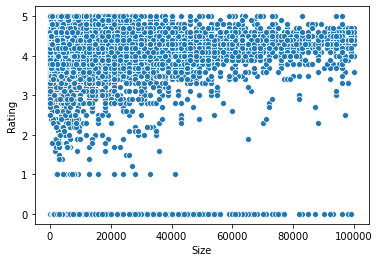

In [48]:
sns.scatterplot(x='Size', y='Rating', data=google_play_df)

# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Question 4: You choose what you want to investigate